# Game: Hungry Kitty

## 1. Rules

Your feline friend is on a mission to catch five juicy birds before settling down for a well-deserved nap.

As your Hungry Kitty roams around the house patio in pursuit of its prey, it will come across various types of food to keep its energy up. Scrumptious delights such as chicken, tuna, and shrimp will help your kitty grow larger, while toxic treats like broccoli, chocolate, and onions will make it sick and shrink in size.

Watch out! As your kitty grows, so does its hitbox, increasing the chances of accidentally consuming toxic food.

Feeling stuck? Click anywhere on the screen to make new items appear - but beware! Both delicious and toxic foods may materialize with each click.

Control your Hungry Kitty using either the WASD keys or arrow keys on your keyboard, and press ESC to exit the game. Have fun and enjoy this delightful adventure!

## 2. Flowchart

In [59]:
from graphviz import Digraph

In [60]:
dot = Digraph(comment='Hungry Kitten')

dot.node('START', 'START', shape='oval', style='filled', fillcolor='grey')
dot.node('Display Start Screen', 'Display Start Screen')
dot.node('Check for launching Event', 'Check for \n launching Event')
dot.node('Initialise Game variables', 'Initialise \n Game variables')

dot.node('Enter Game Loop', 'Enter Game Loop')
dot.node('Check for Game Event', 'Check for \n Game Event')
dot.node('Save Player Move Request', 'Save Player \n Move Request')
dot.node('Manually Add Random Food on the Board', 'Manually \n Add Random Food \n on the Board')
dot.node('Automatically Add Each Food type on the Board', 'Automatically \n Add Each Food type \n on the Board')
dot.node('Draw Board & Menu', 'Draw Board & Menu')
dot.node('Compute New Player Location', 'Compute New \n Player Location')
dot.node('Draw Player', 'Draw Player')

dot.node('Check if Player intersected an item', 'Check if Player intersected an item')
dot.node('Draw Score', 'Draw Score')
dot.node('Check Losing Condition', 'Check Losing Condition')
dot.node('Check Winning Condition', 'Check Winning Condition')

dot.node('Check Game Loop Breaking Status', 'Check Game Loop \n Breaking Status')
dot.node('Draw all the game items', 'Draw all the game items')
dot.edge('Display on Screen Every Drawn Object', 'Display on Screen \n Every Drawn Object')

dot.node('Exit Game Loop', 'Exit Game Loop')
dot.node('Draw Respective End Game Cinematic', 'Draw Respective \n End Game Cinematic')
dot.node('Display on Screen Every Drawn Object2', 'Display on Screen \n Every Drawn Object')

birds_catched = Digraph('Birds Catched', node_attr={'shape': 'doublecircle', 'color': 'green'})
birds_catched.node('Win','Win')
dot.subgraph(birds_catched)

cat_disappeared = Digraph('Cat Disappeared', node_attr={'shape': 'doublecircle', 'color': 'red'})
cat_disappeared.node('Lose','Lose')
dot.subgraph(cat_disappeared)

dot.node('Play Again?', 'Play Again?')
dot.node('END', 'END', shape='oval', style='filled', fillcolor='grey')

In [61]:
dot.edge('START', 'Display Start Screen')
dot.edge('Display Start Screen', 'Check for launching Event')
dot.edge('Check for launching Event', 'END', label='Event == QUIT')
dot.edge('Check for launching Event', 'Initialise Game variables', label='Event not QUIT')
dot.edge('Initialise Game variables', 'Enter Game Loop')
dot.edge('Enter Game Loop', 'Check for Game Event')
dot.edge('Check for Game Event', 'END', label='Event == QUIT')
dot.edge('Check for Game Event', 'Save Player Move Request', label='Event == KEYUP \n Event == KEYDOWN \n')
dot.edge('Check for Game Event', 'Manually Add Random Food on the Board', label='Event == MOUSEBUTTONUP')
dot.edge('Save Player Move Request', 'Automatically Add Each Food type on the Board')
dot.edge('Manually Add Random Food on the Board', 'Automatically Add Each Food type on the Board')

dot.edge('Automatically Add Each Food type on the Board', 'Draw Board & Menu')
dot.edge('Draw Board & Menu', 'Compute New Player Location')
dot.edge('Compute New Player Location', 'Draw Player')
dot.edge('Draw Player', 'Check if Player intersected an item')

dot.edge('Check if Player intersected an item', 'Draw Score', label='Intersected \n Good Food Item \n = Increase Player Size')

dot.edge('Check if Player intersected an item', 'Check Losing Condition', label='Intersected \n Toxic Food \n = Decrease Player Size')
dot.edge('Check Losing Condition', 'Lose', label='Player Size =< 0')
dot.edge('Lose', 'Draw Score')
dot.edge('Check Losing Condition', 'Draw Score', label='Player Size > 0')

dot.edge('Check if Player intersected an item', 'Check Winning Condition', label='Intersected \n Bird \n = Increase Score Counter by 1')
dot.edge('Check Winning Condition', 'Win', label='Bird Counter >= 5')
dot.edge('Win', 'Draw Score', label='Bird Counter >= 5')
dot.edge('Check Winning Condition', 'Draw Score', label='Bird Counter < 5')

dot.edge('Draw Score', 'Check Game Loop Breaking Status')
dot.edge('Check Game Loop Breaking Status', 'Draw all the game items', label='No')
dot.edge('Draw all the game items', 'Display on Screen Every Drawn Object')
dot.edge('Display on Screen Every Drawn Object', 'Check for Game Event')

dot.edge('Check Game Loop Breaking Status', 'Exit Game Loop', label='Yes: Player Won or Lost')
dot.edge('Exit Game Loop', 'Draw Respective End Game Cinematic', label='Winning vs Losing')
dot.edge('Draw Respective End Game Cinematic', 'Display on Screen Every Drawn Object2')
dot.edge('Display on Screen Every Drawn Object2', 'Play Again?')
dot.edge('Play Again?', 'Check for launching Event', label='Yes')
dot.edge('Play Again?', 'END', label='No')        

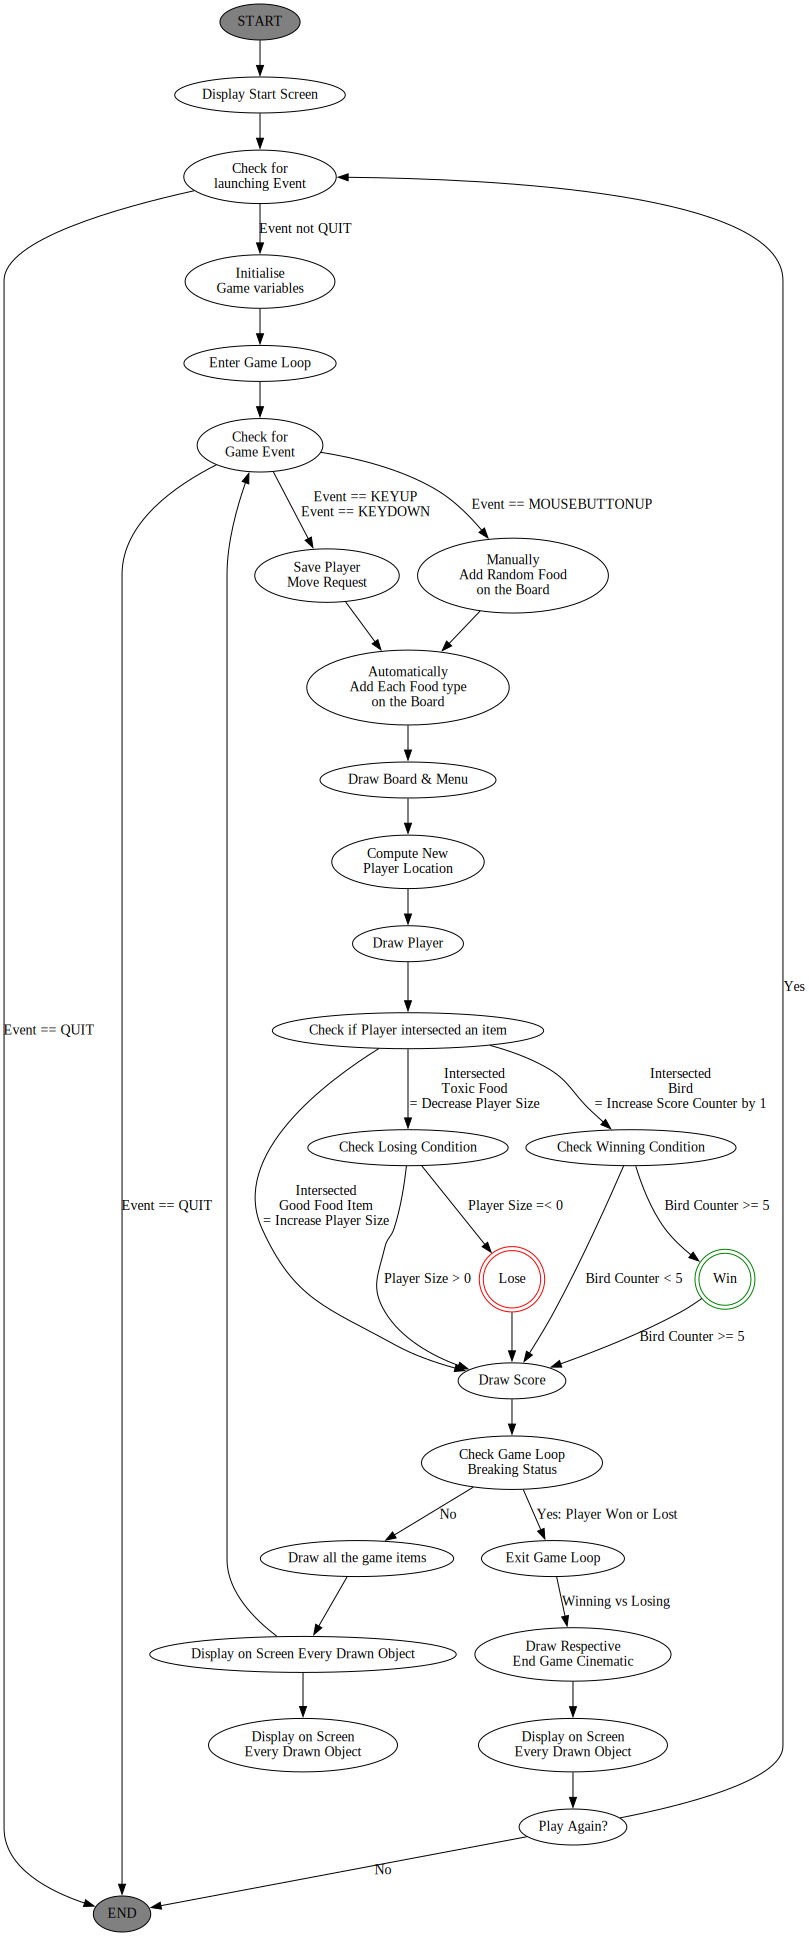

In [62]:
dot

## 3. Program

In [66]:
# 1. Import pygame Module
import pygame, sys, time, random
from pygame.locals import *

# 2. Set up constants
# windowSurface
WINDOWWIDTH = 800
WINDOWHEIGHT = 800
# menuSurface
MENUWIDTH = 800
MENUHEIGHT = 50
# Good Food
FOODHEIGHT = 20
FOODWIDTH = 40
# Toxic Food
TOXICHEIGHT = 40
TOXICWIDTH = 40
# Birds
BIRDHEIGHT = 40
BIRDWIDTH = 40
# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREY = (128, 128, 128)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
PINK = (255,153,255)
# Refresh rates
NEWBIRD = 500
NEWTOXIC = 30
NEWFOOD = 30

# 3. Functions
# Draw text onto the window
def drawText(text, font, color, surface, x, y):
    textobj = font.render(text, 1, color)
    textrect = textobj.get_rect()
    textrect.topleft = (x, y)
    surface.blit(textobj, textrect)
# Terminate the program/game
def terminate():
    pygame.quit()
    sys.exit()
# Infinitely loop that only breaks when the players decides to quit
def waitForPlayerToPressKey():
    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                terminate()
            if event.type == KEYDOWN:
                if event.key == K_ESCAPE: # Pressing ESC quits.
                    terminate()
                return
# Assign items to a location onto the window
def assignItem(itemImageList, itemList, xPosition, yPosition, itemWidth, itemHeight):
    item_type = random.choice(itemImageList)
    itemList.append((pygame.Rect(xPosition, yPosition, itemWidth, itemHeight), item_type))
                 
# 4. Initialise
# Pygame
pygame.init()
mainClock = pygame.time.Clock()
# windowSurface Size
windowSurface = pygame.display.set_mode((WINDOWWIDTH, WINDOWHEIGHT), 0, 32)
# windowSurface Caption
pygame.display.set_caption('Hungry Kitty')
# Mouse
pygame.mouse.set_visible(True)
# Fonts
kitty_path1 = "C:/Users/pauly/OneDrive/Documents/PythonGameFolder/attack-of-blood-font/AttackOfBlood-0wWX.ttf"
kitty_path2 = "C:/Users/pauly/OneDrive/Documents/PythonGameFolder/kitty-paw-font/KittyPawDemo-rgq47.ttf"
font1 = pygame.font.Font(kitty_path1, 84)
font2 = pygame.font.Font(kitty_path2, 90)
font3 = pygame.font.Font(kitty_path1, 60)
font4 = pygame.font.Font(kitty_path2, 28)
font5 = pygame.font.SysFont(None, 40) # pygame.font.Font(kitty_path1, 40)
font6 = pygame.font.Font(kitty_path2, 65)
# Background Music
pygame.mixer.music.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/Catsong.wav")
# Sounds
introSound = pygame.mixer.Sound("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/adventuremusic.mp3")
pickUpSound = pygame.mixer.Sound("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/happycat.ogg")
pickUpSound2 = pygame.mixer.Sound("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/sadcat.wav")
pickUpSound3 = pygame.mixer.Sound("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/welldone.ogg")
gameOverSound = pygame.mixer.Sound("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/gameovercute.mp3")
youWinSound = pygame.mixer.Sound("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/youwin.wav")
# Background Image
backgroundImage = pygame.image.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/floor.jpg")
backgroundStretchedImage = pygame.transform.scale(backgroundImage, (800, 800))
# Speed variable
MOVESPEED = 6
# Player data structure
player = pygame.Rect(300, 100, 40, 40)
playerImage = pygame.image.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/cat.png")
playerStretchedImage = pygame.transform.scale(playerImage, (40, 40))
# Good food data structure
foodImage = pygame.image.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/fish.png")
food2Image = pygame.image.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/chicken.png")
food3Image = pygame.image.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/shrimp.png")
foodStretchedImage = pygame.transform.scale(foodImage, (FOODWIDTH, FOODHEIGHT))
food2StretchedImage = pygame.transform.scale(food2Image, (FOODWIDTH, FOODHEIGHT))
food3StretchedImage = pygame.transform.scale(food3Image, (FOODWIDTH, FOODHEIGHT))
foodImgs = [foodStretchedImage, food2StretchedImage, food3StretchedImage]
# Toxic food data structure
toxicImage = pygame.image.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/brocoli.png")
toxic2Image = pygame.image.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/chocolate.png")
toxic3Image = pygame.image.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/onion.png")
toxicStretchedImage = pygame.transform.scale(toxicImage, (TOXICWIDTH, TOXICHEIGHT))
toxic2StretchedImage = pygame.transform.scale(toxic2Image, (TOXICWIDTH, TOXICHEIGHT))
toxic3StretchedImage = pygame.transform.scale(toxic3Image, (TOXICWIDTH, TOXICHEIGHT))
toxicImgs = [toxicStretchedImage, toxic2StretchedImage, toxic3StretchedImage]
# Bird data structure
birdImage = pygame.image.load("C:/Users/pauly/OneDrive/Documents/PythonGameFolder/bird.png")
birdStretchedImage = pygame.transform.scale(birdImage, (BIRDWIDTH, BIRDHEIGHT))

# 5.START screen
windowSurface.fill(BLACK)
windowSurface.blit(playerImage,(30,30))
introSound.play()
drawText('HUNGRY', font1, PINK, windowSurface, WINDOWWIDTH / 4 - 70, WINDOWHEIGHT / 2 - 110)
drawText('KITTY', font2, PINK, windowSurface, WINDOWWIDTH / 5 - 60, WINDOWHEIGHT / 2 - 35)
drawText('Press a key to start', font3, WHITE, windowSurface, WINDOWWIDTH / 4 + 30, WINDOWHEIGHT / 5 * 4 -50 )
drawText('Press ESC to quit', font3, GREY, windowSurface, WINDOWWIDTH / 4 + 40, WINDOWHEIGHT / 5 * 4 + 10)
pygame.display.update()
waitForPlayerToPressKey()
introSound.stop()
#### Game Loop 1
while True:
    # 6. Initialise game post START screen
    # Good food variable
    foodCounter = 0
    foods = []
    for i in range(20):
        assignItem(foodImgs, foods, random.randint(0, WINDOWWIDTH - FOODWIDTH), random.randint(0, WINDOWHEIGHT - MENUHEIGHT - FOODHEIGHT), FOODWIDTH, FOODHEIGHT)
    # Toxic food variable
    toxicCounter = 0
    toxics = []
    for i in range(5):
        assignItem(toxicImgs, toxics, random.randint(0, WINDOWWIDTH - TOXICWIDTH), random.randint(0, WINDOWHEIGHT - MENUHEIGHT - TOXICHEIGHT), TOXICWIDTH, TOXICHEIGHT)
    # Bird variable
    birdCounter = 0
    birds = []
    for i in range(1):
        birds.append(pygame.Rect(random.randint(0, WINDOWWIDTH - BIRDWIDTH), random.randint(0, WINDOWHEIGHT - MENUHEIGHT - BIRDHEIGHT), BIRDWIDTH, BIRDHEIGHT))
    # Movement variables
    moveLeft = moveRight = moveUp = moveDown = False
    # Play background Music
    pygame.mixer.music.play(-1, 0.0)
    # Score variable
    score = 0
    # Win-Loss condition variable
    flag = 0

    # Game loop 2: runs while the game part is playing
    while True:
        # 7. Check for events:
        for event in pygame.event.get():
            # A. Quit the game
            if event.type == QUIT:
                terminate()
            # B. Retieve the player's square moves by changing the keyboard variables
            if event.type == KEYDOWN:
                if event.key == K_LEFT or event.key == K_a:
                    moveRight = False
                    moveLeft = True
                if event.key == K_RIGHT or event.key == K_d:
                    moveLeft = False
                    moveRight = True
                if event.key == K_UP or event.key == K_w:
                    moveDown = False
                    moveUp = True
                if event.key == K_DOWN or event.key == K_s:
                    moveUp = False
                    moveDown = True
            if event.type == KEYUP:
                # C. Quit the game bis
                if event.key == K_ESCAPE:
                    terminate()
                # D. STOP retieveing the player's square moves
                if event.key == K_LEFT or event.key == K_a:
                    moveLeft = False
                if event.key == K_RIGHT or event.key == K_d:
                    moveRight = False
                if event.key == K_UP or event.key == K_w:
                    moveUp = False
                if event.key == K_DOWN or event.key == K_s:
                    moveDown = False
                # E. Teleporting the player
                if event.key == K_x:
                    player.top = random.randint(0, WINDOWHEIGHT - MENUHEIGHT - player.height)
                    player.left = random.randint(0, WINDOWWIDTH - player.width)

            # Manually adding either new food or toxic food squares
            if event.type == MOUSEBUTTONUP:
                if event.pos[1] < WINDOWHEIGHT - MENUHEIGHT:   
                    foodchoice = random.randint(0,1)
                    if foodchoice == 1:
                        assignItem(foodImgs, foods, event.pos[0] - FOODWIDTH, event.pos[1] - FOODHEIGHT, FOODWIDTH, FOODHEIGHT)
                    else:
                        assignItem(toxicImgs, toxics, event.pos[0] - TOXICWIDTH, event.pos[1] - TOXICHEIGHT, TOXICWIDTH, TOXICHEIGHT)

        # 8. Automatically adding new items
        # Food
        foodCounter += 1
        if foodCounter >= NEWFOOD:
            foodCounter = 0
            assignItem(foodImgs, foods, random.randint(0, WINDOWWIDTH - FOODWIDTH), random.randint(0, WINDOWHEIGHT - MENUHEIGHT - FOODHEIGHT), FOODWIDTH, FOODHEIGHT)   
        # Toxic food
        toxicCounter += 1
        if toxicCounter >= NEWTOXIC:
            toxicCounter = 0
            assignItem(toxicImgs, toxics, random.randint(0, WINDOWWIDTH - TOXICWIDTH), random.randint(0, WINDOWHEIGHT - MENUHEIGHT - TOXICHEIGHT), TOXICWIDTH, TOXICHEIGHT)
        # Birds
        birdCounter += 1
        if birdCounter >= NEWBIRD:
            birdCounter = 0
            birds.append(pygame.Rect(random.randint(0, WINDOWWIDTH - BIRDWIDTH), random.randint(0, WINDOWHEIGHT - MENUHEIGHT - BIRDHEIGHT), BIRDWIDTH, BIRDHEIGHT))

        # 9. Draw the game background onto the windowSurface
        windowSurface.blit(backgroundStretchedImage, (0, 0))
        # Menu
        pygame.draw.rect(windowSurface, GREY, (0, WINDOWHEIGHT - MENUHEIGHT, MENUWIDTH, MENUHEIGHT))

        # 10. Move the player
        if moveDown and player.bottom < (WINDOWHEIGHT - MENUHEIGHT):
            player.top += MOVESPEED
        if moveUp and player.top > 0:
            player.top -= MOVESPEED
        if moveLeft and player.left > 0:
            player.left -= MOVESPEED
        if moveRight and player.right < WINDOWWIDTH:
            player.right += MOVESPEED

        # 11. Draw the player onto the surface
        windowSurface.blit(playerStretchedImage, player) # ALTERNATIVE: pygame.draw.rect(windowSurface, BLACK, player)

        # 12. Check if the player has intersected with any items
        # Food
        for food, food_img in foods[:]:
            if player.colliderect(food):
                foods.remove((food, food_img))
                pickUpSound.play()
                player = pygame.Rect(player.left, player.top, player.width + 10, player.height + 10)
                playerStretchedImage = pygame.transform.scale(playerImage, (player.width, player.height))
                
        # Toxic food
        for toxic, toxic_img in toxics[:]:
            if player.colliderect(toxic):
                toxics.remove((toxic, toxic_img))
                pickUpSound2.play()
                if player.width - 20 > 0 and player.height - 20 > 0:
                    player = pygame.Rect(player.left, player.top, player.width - 20, player.height - 20)
                    playerStretchedImage = pygame.transform.scale(playerImage, (player.width, player.height))
                else:
                    flag = 1
                
        # Birds
        for bird in birds[:]:
            if player.colliderect(bird):
                birds.remove(bird)
                pickUpSound3.play()
                if not flag == 1:
                    score += 1
        
        # 13. Draw the score
        drawText('Score', font4, WHITE, windowSurface, (MENUWIDTH / 8 - 50), (WINDOWHEIGHT - MENUHEIGHT + 5))
        drawText(': %s / 5 birds' % (score), font5, WHITE, windowSurface, (MENUWIDTH / 4 + 50), (WINDOWHEIGHT - MENUHEIGHT + 20))
        
        # 14. Break the loop if necessary
        if flag == 1 or score >= 5:
            break
             
        # 15. Draw the items
        # Food
        for food, food_img in foods:
            windowSurface.blit(food_img, food) # ALTENATIVE: pygame.draw.rect(windowSurface, GREEN, foods[i])
        # Toxic food
        for toxic, toxic_img in toxics:
            windowSurface.blit(toxic_img, toxic)
        # Birds
        for bird in birds:
            windowSurface.blit(birdStretchedImage, bird)
        
        # 16. Draw the window onto the screen every turn
        pygame.display.update()
        mainClock.tick(40)

    # 17. Stop the game and show the win/loss message
    if flag == 1:
        drawText('Game Over', font6, WHITE, windowSurface, MENUWIDTH / 8 - 78, (WINDOWHEIGHT - MENUHEIGHT) / 2)
        pygame.mixer.music.stop()
        gameOverSound.play()
    elif score >= 5:
        drawText('You Win', font6, WHITE, windowSurface, MENUWIDTH / 8 + 5, (WINDOWHEIGHT - MENUHEIGHT) / 2)
        pygame.mixer.music.stop()
        youWinSound.play()
        
    drawText('Press a key to play again', font1, WHITE, windowSurface, (WINDOWWIDTH / 4) - 60, (WINDOWHEIGHT / 3 * 2) + 40)
    drawText('Press ESC to quit', font3, WHITE, windowSurface, WINDOWWIDTH / 4 + 40, WINDOWHEIGHT / 5 * 4 + 10)

    # 18. Draw the window onto the screen
    pygame.display.update()
    waitForPlayerToPressKey()
    
    if flag == 1:
        gameOverSound.stop()
    elif score >= 5:
        youWinSound.stop()

SystemExit: 

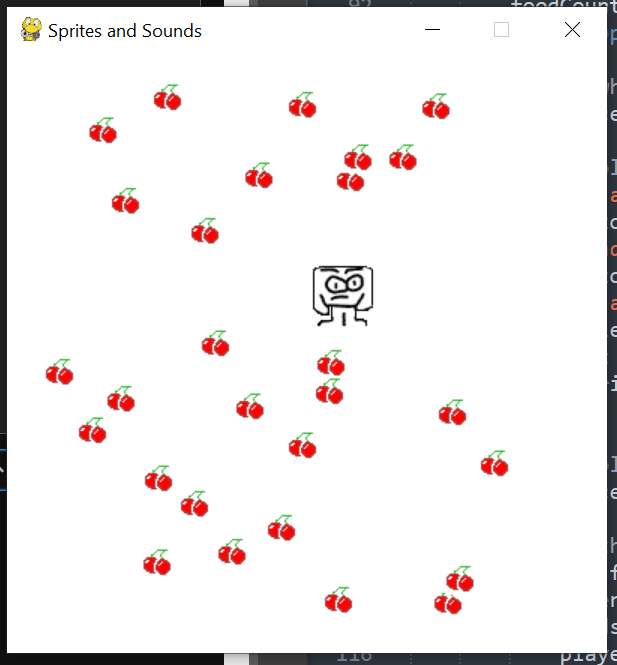

In [65]:
# Output
from IPython.display import Image
Image(filename="C:/Users/pauly/OneDrive/Documents/PythonGameFolder/Pygamesoundimage.png")

## 4. Graphic Design Methodology

### 4.1. Import pygame Module

In [ ]:
## 1. Import pygame Module
# import pygame, sys
# from pygame.locals import *

### 4.2. Initialise pygame

In [ ]:
## 2. Initialise pygame
# pygame.init()

### 4.3. Set up windowSurface

The window is a Graphical User Interface (GUI) window.
- pygame.surface object = window
- object = stores data + has methods.
- method = function associated to an object

#### set_mode() function

Function that returns a pygame.surface object.

set_mode(parameter 1, parameter 2, parameter 3)
- parameter 1: We can create a 500 pixels wide and 400 pixels tall window by using a tuple. FYI, tuples are immutable lists.
- parameter 2: Advanced option
- parameter 3: Advanced option

In [ ]:
## 3. Set up windowSurface
## Size
# windowSurface = pygame.display.set_mode((500, 400), 0, 32) 

#### set_caption() method

Method that sets the window's caption to read 'Hello World!'

In [ ]:
## Caption
# pygame.display.set_caption('Hello world!')

### 4.4. Appoint color variables 

Color variables are in RGB

In [ ]:
## 4. Appoint color variables
# BLACK = (0, 0, 0)
# WHITE = (255, 255, 255)
# RED = (255, 0, 0)
# GREEN = (0, 255, 0)
# BLUE = (0, 0, 255)

### 4.5. Set the text to be written onto the windowSurface

#### font() function

Function that creates a pygame.font.Font object.

font(parameter 1, parameter 2)
- parameter 1: name of the font
- parameter 2:size of the font

In [ ]:
## 5. Set the text to be written onto the windowSurface
## Font Object Style
# basicFont = pygame.font.SysFont(None, 48)

#### render() method

Method that returns a Surface object with the text drawn on it.

render(parameter 1, parameter 2, parameter 3, parameter 4)
- parameter 1 = string of the text to draw
- parameter 2 = boolean for whether or not to anti-alias (blur the edges) of the font
- parameter 3 = color of the text to render
- parameter 4 = background color of the text to render

In [ ]:
## Font Object Rendering
# text = basicFont.render('Hello world!', True, WHITE, BLUE)

#### rect() function

Function that creates a new Rect object with its respective x- and y-coordinates representing rectangular areas of a certain size on a window.
It is a Constructor Function = Function that has the same name as its data type and create objects or values of its data.

pygame.Rect(parameter 1 = left, parameter 2 = top, parameter 3 = width, parameter 4 = height) 

#### get_rect() function

Function that helps you retrieve the Rect object if it has already been created.

- We have already created the Font object + windowSurface object => Rect objects were already created.
- Hence, we just need to retrieve them with get_rect().

In [ ]:
## Font Object Rect retrieval
# textRect = text.get_rect() 

To center your Font object in the center of the windowSurface object, you just need to retrieve the center coordinated of the windowSurface.

In [ ]:
## Font Object localisation
# textRect.centerx = windowSurface.get_rect().centerx
# textRect.centery = windowSurface.get_rect().centery

### 4.6. Draw onto the windowSurface

#### fill() method

Method that completely covers the surface with the color set as the parameter.

fill(color)

In [ ]:
## 6. Draw onto the windowSurface
## Surface Object Color Filling
# windowSurface.fill(WHITE)

#### draw.polygon() function

draw.polygon(parameter 1, parameter 2, parameter 3, parameter 4)
- parameter 1 = surface object to draw the polygon on
- parameter 2 = color of the polygon
- parameter 3 = tuple of tuples representing the x- andy-coordinates of the points to draw in order. The last tuple will automatically connect to the first tuple to complete the shape
- parameter 4 = optionally, an integer for the width of the polygon lines. Without this, the polygon will be filled in.

In [ ]:
## Draw a green polygon
# pygame.draw.polygon(windowSurface, GREEN, ((146, 0), (291, 106), (236, 277), (56, 277), (0, 106)))

#### draw.line() function

draw.line(parameter 1, parameter 2, parameter 3, parameter 4, parameter 5)
- parameter 1 = surface object to draw the line on
- parameter 2 = color of the line
- parameter 3 = a tuple of 2 integers for the x-coordinates of one end of the line
- parameter 4 = a tuple of 2 integers for the y-coordinates of the other end of the line
- parameter 5 = optionally, an integer for the width of the line in pixels.

In [ ]:
## Draw some blue lines
# pygame.draw.line(windowSurface, BLUE, (60, 60), (120, 60), 4)
# pygame.draw.line(windowSurface, BLUE, (120, 60), (60, 120))
# pygame.draw.line(windowSurface, BLUE, (60, 120), (120, 120), 4)

#### draw.circle() function

draw.circle(parameter 1, parameter 2, parameter 3, parameter 4, parameter 5)
- parameter 1 = surface object to draw the circle on
- parameter 2 = color of the circle
- parameter 3 = a tuple of 2 integers for the x- and y-coordinates of the center of the circle
- parameter 4 = an integer for the radius of the circle
- parameter 5 = optionally, an integer for the width of the line. A width of 0 means that the circle will be filled in.

In [ ]:
## Draw a blue circle
# pygame.draw.circle(windowSurface, BLUE, (300, 50), 20, 0)

#### draw.ellipse() function

draw.ellipse(parameter 1, parameter 2, parameter 3, parameter 4)
- parameter 1 = surface object to draw the ellipse on
- parameter 2 = color of the ellipse
- parameter 3 = a tuple of 4 integers for the left and top corner of the ellipse's Rect object and the width and height of the ellipse
- parameter 4 = optionally, an integer for the width of the line. A width of 0 means that the ellipse will be filled in.

In [ ]:
## Draw a red ellipse
# pygame.draw.ellipse(windowSurface, RED, (300, 250, 40, 80), 1)

#### draw.rect() function

draw.rect(parameter 1, parameter 2, parameter 3)
- parameter 1 = surface object to draw the rectangle on
- parameter 2 = color of the rectangle
- parameter 3 = a tuple of 4 integers for the top-left corner and the width and height of the rectangle. Instead of a tuple of 4 integers for the third parameter, we can also pass a Rect object.

In [ ]:
## Draw the text's background rectangle
# pygame.draw.rect(windowSurface, RED, (textRect.left - 20, textRect.top - 20, textRect.width + 40, textRect.height + 40))

#### PixelArray() object

If we want to draw a very detailed or customized image to the screen _ instead of just large shape _ we need a high per-pixel level of control.
The PixelArray() object gives us this level of control by taking the Surface object (e.j. windowSurface) and cutting it into a list of lists of color tuples.

pixArray[x-coordinate][y-coordinate] = Color

In [ ]:
## Coloring Pixels
# pixArray = pygame.PixelArray(windowSurface)
# pixArray[480][380] = BLACK

#### del operator

Every time we create a PixelArray object from a Surface object, that Surface object is locked.
That means no blit() method calls can be made on that Surface object.
To unlock the Surface object, you must delete the Pixel Array object with the del operator.

In [ ]:
# del pixArray

#### blit() method

Method that draws the contents of one Surface object onto another Surface object. 

blit(parameter 1, parameter 2)
- parameter 1: what you want to draw (text variable for instance).
- parameter 2: where on Surfaceobject the parameter 1 surface should be drawn.

In [ ]:
## Draw the text
# windowSurface.blit(text, textRect)

In [ ]:
## Draw the block onto the surface
# windowSurface.blit(playerStretchedImage, player)

In [ ]:
## Draw the food
# for food in foods:
#     windowSurface.blit(foodImage, food)
# windowSurface.blit(foodImage, food)

### 4.7. Draw the windowSurface onto the screen

In pygame, the window on the screen won't change when we call fill() and draw().
Rather, these will change the Surface objects, and we have to render the new Surface object to the screen with the pygame.display.update() function.

In [ ]:
## 7. Draw the windowSurface onto the screen
# pygame.display.update()

### 4.8. Run the game loop

- Pygame programs are constantly running through a game loop, which executes every line of code in the loop about 100 times a second.
- The game loop constantly checks for new events, updates the state of the window, and draws the window on the screen.
- Events are generated by pygame whenever the user presses a key, clicks or moves the mouse, or performs some other action recognized by the program that should make something happen in the game.

#### event.get() function

The function checks for any new pygame.event.Event objects that have been generated since the last call to pygame.event.get().
- The events are returned as a list of Event objects, which the program will then execute to perform some action in response to the event.
- Each event as a attribute called type that tell us the type of the event.

In [ ]:
## 8. Run the game loop
# while True:
#     for event in pygame.event.get():
#         if event.type == QUIT:
#             pygame.quit()
#            sys.exit()

## 5. Movement Methodology & Example

### 5.1. Create the boxes

Create an easily callable and modifiable dictionnary of variables

In [ ]:
## 5. Set up the box data structure
# b1 = {'rect':pygame.Rect(300, 80, 50, 100), 'color':RED, 'dir':UPRIGHT}
# b2 = {'rect':pygame.Rect(200, 200, 20, 20), 'color':GREEN, 'dir':UPLEFT}
# b3 = {'rect':pygame.Rect(100, 150, 60, 60), 'color':BLUE, 'dir':DOWNLEFT}
# boxes = [b1, b2, b3]

### 5.2. Move the boxes

#### Movespeed

We create a constant variable MOVESPEED to determine how fast the boxes should move, i.e. how many pixels each box should move on each interaction through the game loop.

#### Moving the full data structure

In [ ]:
# if b['dir'] == DOWNLEFT:
#     b['rect'].left -= MOVESPEED
#     b['rect'].top += MOVESPEED
# if b['dir'] == UPRIGHT:
#     b['rect'].left += MOVESPEED
#     b['rect'].top -= MOVESPEED

### 5.3. Bounce the boxes

#### Checking whether the box has moved out of the window

The box has moved past the top:

In [ ]:
# if b['rect'].top < 0:
#     if b['dir'] == UPLEFT:
#         b['dir'] = DOWNLEFT
#     if b['dir'] == UPRIGHT:
#         b['dir'] = DOWNRIGHT

The box has moved past the bottom:

In [ ]:
# if b['rect'].bottom > WINDOWHEIGHT:
#     if b['dir'] == DOWNLEFT:
#         b['dir'] = UPLEFT
#     if b['dir'] == DOWNRIGHT:
#        b['dir'] = UPRIGHT

The box has moved past the left side:

In [ ]:
# if b['rect'].left < 0: 
#     if b['dir'] == DOWNLEFT:
#         b['dir'] = DOWNRIGHT
#     if b['dir'] == UPLEFT:
#         b['dir'] = UPRIGHT

The box has moved past the right side:

In [ ]:
# if b['rect'].right > WINDOWWIDTH:
#     if b['dir'] == DOWNRIGHT:
#         b['dir'] = DOWNLEFT
#     if b['dir'] == UPRIGHT:
#         b['dir'] = UPLEFT

### 5.4. Draw the boxes
#### Draw the box onto the surface.

In [ ]:
# pygame.draw.rect(windowSurface, b['color'], b['rect'])

#### Draw the window onto the screen

In [ ]:
# pygame.display.update()

#### sleep() method

We need the program to run slowly enough that we can see what it boxes look like.

In [ ]:
# time.sleep(0.02)

### 5.5. Application

In [4]:
# 1. Import pygame Module
import pygame, sys, time
from pygame.locals import *

# 2. Initialise pygame
pygame.init()

# 3. Set up windowSurface
# Size
WINDOWWIDTH = 400
WINDOWHEIGHT = 400
windowSurface = pygame.display.set_mode((WINDOWWIDTH, WINDOWHEIGHT), 0, 32)
# Caption
pygame.display.set_caption('Animation')

# 4. Appoint the variables
# Direction
DOWNLEFT = 'downleft'
DOWNRIGHT = 'downright'
UPLEFT = 'upleft'
UPRIGHT = 'upright'
# Speed
MOVESPEED = 4
# Color
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

# 5. Set up the box data structure
b1 = {'rect':pygame.Rect(300, 80, 50, 100), 'color':RED, 'dir':UPRIGHT}
b2 = {'rect':pygame.Rect(200, 200, 20, 20), 'color':GREEN, 'dir':UPLEFT}
b3 = {'rect':pygame.Rect(100, 150, 60, 60), 'color':BLUE, 'dir':DOWNLEFT}
boxes = [b1, b2, b3]

# 6. Run the game loop
while True:
    # Check for quit event
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()

    # Draw the white background onto the surface
    windowSurface.fill(WHITE)

    for b in boxes:
        # Move the boxes
        if b['dir'] == DOWNLEFT:
            b['rect'].left -= MOVESPEED
            b['rect'].top += MOVESPEED
        if b['dir'] == DOWNRIGHT:
            b['rect'].left += MOVESPEED
            b['rect'].top += MOVESPEED
        if b['dir'] == UPLEFT:
            b['rect'].left -= MOVESPEED
            b['rect'].top -= MOVESPEED
        if b['dir'] == UPRIGHT:
            b['rect'].left += MOVESPEED
            b['rect'].top -= MOVESPEED

        # Bounce the boxes by checking whether the box has moved out of the window.
        if b['rect'].top < 0:
            # The box has moved past the top.
            if b['dir'] == UPLEFT:
                b['dir'] = DOWNLEFT
            if b['dir'] == UPRIGHT:
                b['dir'] = DOWNRIGHT
        if b['rect'].bottom > WINDOWHEIGHT:
            # The box has moved past the bottom.
            if b['dir'] == DOWNLEFT:
                b['dir'] = UPLEFT
            if b['dir'] == DOWNRIGHT:
                b['dir'] = UPRIGHT
        if b['rect'].left < 0:
            # The box has moved past the left side.
            if b['dir'] == DOWNLEFT:
                b['dir'] = DOWNRIGHT
            if b['dir'] == UPLEFT:
                b['dir'] = UPRIGHT
        if b['rect'].right > WINDOWWIDTH:
            # The box has moved past the right side.
            if b['dir'] == DOWNRIGHT:
                b['dir'] = DOWNLEFT
            if b['dir'] == UPRIGHT:
                b['dir'] = UPLEFT

        # Draw the box onto the surface.
        pygame.draw.rect(windowSurface, b['color'], b['rect'])

    # Draw the window onto the screen
    pygame.display.update()
    time.sleep(0.02)

SystemExit: 

## 6. Collision Detection Methodology & Example

Collision detection can help determine whether:
- an enemy has touched the player's character and makes it lose health
- the player's character has touched a coin and it gras it
- the player's character is standing on solid ground or there's nothing but empty air beneath them

### 6.1. Clock Pacing

#### time.Clock() function

Function that pauses longer on fast computers and shorter on slow computers in order to get our program to run at the smae speed on any computer.
The pygame.time.Clock object can pause an appropriate amount of time on any computer.

In [ ]:
# mainClock = pygame.time.Clock()

#### tick() method

Method that waits enough time so that it runs at about 40 iteractions a second, no matter what the computer's speed is.
The program will never run faster than expected.

In [ ]:
# mainClock.tick(40)

### 6.2. Checking for events

#### QUIT

Generated when the player closes the window.

In [ ]:
# event.type == QUIT

#### KEYDOWN

Generated when the player presses a key.
- Key attribute: tells which key was pressed.
    - Left direction: K_LEFT or K_a
    - Right direction: K_RIGHT or K_d
    - Up direction: K_UP or K_w
    - Down direction: K_DOWN or K_s
    - '''
- Mode attribute: tells whether the SHIFT, CTRL, ALT, or other keys were held down when this key was pressed.

In [ ]:
# event.type == KEYDOWN

#### KEYUP

Generated when the player releases a key.
- Same attributes as KEYDOWN

In [ ]:
# event.type == KEYUP

#### MOUSEMOTION

Generared whenever the mouve moves over the window.
- pos attribute: returns a (x,y) tuple for the coordinates of where the mouse is in the window.
- rel attribute: returns a (x,y) tuple for the relative coordinates since the last MOUSEMOTION event.


In [ ]:
# event.type == MOUSEMOTION

#### MOUSEBUTTONDOWN

Generated when a mouse button is pressed in the window.
- pos attribute: returns a (x,y) tuple for the coordinates of where the mouse was positioned in the window when the button was pressed
- button attribute: integer 1 to 5
    - 1 = Left button
    - 2 = Middle button
    - 3 = Right button
    - 4 = Scroll wheel moved up
    - 5 = Scroll wheel moved down

In [ ]:
# event.type == MOUSEBUTTONDOWN

#### MOUSEBUTTONUP

Generated when the mouse button is released.
- Sakes attributes as MOUSEBUTTONUP.

In [ ]:
# event.type == MOUSEBUTTONUP

### 6.3. Collision course

#### Do not change a list while iterating over it

foods[:] gives us a copy of the list with the items from the start to the end.

This is faster that creating a getFoodlistCopy function.

In [ ]:
# for food in foods[:]:
#     if player.colliderect(food):
#        foods.remove(food)

#### colliderect() method

Method attached to the Rect object that returns True if the two rectangles collide and False if they don't.

In [ ]:
# player.colliderect(food)

## 7. Using sound and images

### 7.1. Music & Sound

#### mixer.Sound() function

This constructor function creates a pygame.mixer.Sound object to highlight an event.

In [ ]:
# pickUpSound = pygame.mixer.Sound('pickup.wav')

#### mixer.Sound.play() method

This method plays the event sound effect when called.

In [ ]:
# pickUpSound.play()

#### mixer.music.load() method

This method loads the background music.

In [ ]:
# pygame.mixer.music.load('background.mid')

#### mixer.music.play() method

This method starts playing the backgorund music.

mixer.music.play(parameter 1, parameter 2)
- parameter 1: how many times to play the backgrounf music after the first time we play it.
    - (5): the background music will be played 6 times
    - (-1): the background music will be repeat forever.
- parameter 2: point in the sound file top start playing in seconds.
    - (0.0): shall start at the beginning

In [ ]:
# pygame.mixer.music.play(-1, 0.0)

#### mixer.music.stop()

This method stop the music playing.

In [ ]:
# if event.key == K_m:
#     if musicPlaying:
#         pygame.mixer.music.stop()
#     else:
#         pygame.mixer.music.play(-1, 0.0)
#     musicPlaying = not musicPlaying    

### 7.2. Sprite

A Sprite in an image.

#### image.load() function

Function that loads an image into a surface object.

In [ ]:
# playerImage = pygame.image.load('player.png')
# foodImage = pygame.image.load('cherry.png')

#### transform.scale() method

Method that shrinks or enlarges the sprite into the desired scale.

In [ ]:
# playerStretchedImage = pygame.transform.scale(playerImage, (40, 40))
# playerStretchedImage = pygame.transform.scale(playerImage, (player.width, player.height))